https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense

In [1]:
# !pip install geopandas folium 

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
import seaborn as sns

import folium
import geopandas as gpd

from sklearn.model_selection import GroupKFold, LeaveOneGroupOut
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

np.set_printoptions(linewidth=95, edgeitems=5)

In [3]:
train = pd.read_csv('../data//train.csv',
                    index_col='ID_LAT_LON_YEAR_WEEK')
test = pd.read_csv('../data/test.csv',
                   index_col='ID_LAT_LON_YEAR_WEEK')
train

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205


In [4]:
for i, f in enumerate(train.columns):
    print(f"{i:2}: {f}")

 0: latitude
 1: longitude
 2: year
 3: week_no
 4: SulphurDioxide_SO2_column_number_density
 5: SulphurDioxide_SO2_column_number_density_amf
 6: SulphurDioxide_SO2_slant_column_number_density
 7: SulphurDioxide_cloud_fraction
 8: SulphurDioxide_sensor_azimuth_angle
 9: SulphurDioxide_sensor_zenith_angle
10: SulphurDioxide_solar_azimuth_angle
11: SulphurDioxide_solar_zenith_angle
12: SulphurDioxide_SO2_column_number_density_15km
13: CarbonMonoxide_CO_column_number_density
14: CarbonMonoxide_H2O_column_number_density
15: CarbonMonoxide_cloud_height
16: CarbonMonoxide_sensor_altitude
17: CarbonMonoxide_sensor_azimuth_angle
18: CarbonMonoxide_sensor_zenith_angle
19: CarbonMonoxide_solar_azimuth_angle
20: CarbonMonoxide_solar_zenith_angle
21: NitrogenDioxide_NO2_column_number_density
22: NitrogenDioxide_tropospheric_NO2_column_number_density
23: NitrogenDioxide_stratospheric_NO2_column_number_density
24: NitrogenDioxide_NO2_slant_column_number_density
25: NitrogenDioxide_tropopause_pressur

In [5]:
print(train.groupby(['latitude', 'longitude']).size().sort_values())
print()
print(test.groupby(['latitude', 'longitude']).size().sort_values())
print()
print(pd.concat([train, test], axis=0).groupby(['latitude', 'longitude']).size().sort_values())

latitude  longitude
-3.299    30.301       159
-1.444    30.856       159
-1.450    29.350       159
-1.482    30.618       159
-1.486    29.614       159
                      ... 
-2.293    29.507       159
-2.300    29.200       159
-2.301    29.899       159
-2.257    30.243       159
-0.510    29.290       159
Length: 497, dtype: int64

latitude  longitude
-3.299    30.301       49
-1.444    30.856       49
-1.450    29.350       49
-1.482    30.618       49
-1.486    29.614       49
                       ..
-2.293    29.507       49
-2.300    29.200       49
-2.301    29.899       49
-2.257    30.243       49
-0.510    29.290       49
Length: 497, dtype: int64

latitude  longitude
-3.299    30.301       208
-1.444    30.856       208
-1.450    29.350       208
-1.482    30.618       208
-1.486    29.614       208
                      ... 
-2.293    29.507       208
-2.300    29.200       208
-2.301    29.899       208
-2.257    30.243       208
-0.510    29.290       208
Length

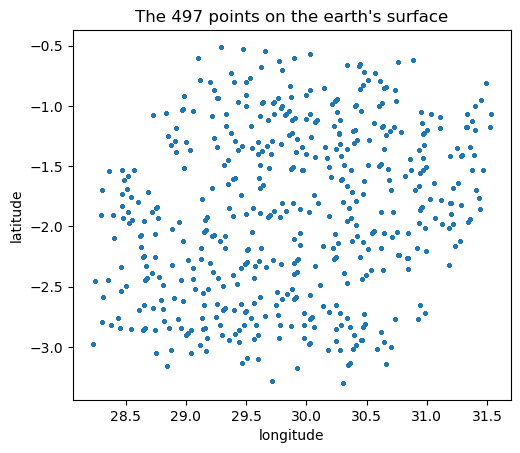

In [6]:
plt.title("The 497 points on the earth's surface")
plt.scatter(train.longitude, train.latitude, s=3)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.gca().set_aspect('equal')
plt.show()

In [7]:
# Taken from https://www.kaggle.com/code/inversion/getting-started-eda

train_coords = train.drop_duplicates(subset = ['latitude', 'longitude'])
geometry = gpd.points_from_xy(train_coords.longitude, train_coords.latitude)
geo_df = gpd.GeoDataFrame(
    train_coords[["latitude", "longitude"]], geometry=geometry
)

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each location
for coordinates in geo_df_list:

    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            color =  "red"),
        )
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

In [8]:
with pd.option_context("display.min_rows", 14):
    display(train.isna().sum().sort_values())
print()
with pd.option_context("display.min_rows", 14):
    display(test.isna().sum().sort_values())

latitude                                          0
week_no                                           0
emission                                          0
longitude                                         0
year                                              0
Cloud_solar_zenith_angle                        484
Cloud_cloud_top_pressure                        484
                                              ...  
UvAerosolLayerHeight_sensor_zenith_angle      78584
UvAerosolLayerHeight_solar_azimuth_angle      78584
UvAerosolLayerHeight_sensor_azimuth_angle     78584
UvAerosolLayerHeight_aerosol_optical_depth    78584
UvAerosolLayerHeight_aerosol_height           78584
UvAerosolLayerHeight_solar_zenith_angle       78584
UvAerosolLayerHeight_aerosol_pressure         78584
Length: 75, dtype: int64

latitude                                          0
longitude                                         0
year                                              0
week_no                                           0
UvAerosolIndex_sensor_altitude                  147
UvAerosolIndex_sensor_azimuth_angle             147
UvAerosolIndex_sensor_zenith_angle              147
                                              ...  
UvAerosolLayerHeight_solar_azimuth_angle      22260
UvAerosolLayerHeight_sensor_azimuth_angle     22260
UvAerosolLayerHeight_sensor_zenith_angle      22260
UvAerosolLayerHeight_aerosol_optical_depth    22260
UvAerosolLayerHeight_aerosol_pressure         22260
UvAerosolLayerHeight_solar_zenith_angle       22260
UvAerosolLayerHeight_aerosol_height           22260
Length: 74, dtype: int64

In [9]:
with pd.option_context("display.max_rows", 100):
    print(train.loc['ID_-0.510_29.290_2019_03'])

latitude                                                        -0.510000
longitude                                                       29.290000
year                                                          2019.000000
week_no                                                          3.000000
SulphurDioxide_SO2_column_number_density                              NaN
SulphurDioxide_SO2_column_number_density_amf                          NaN
SulphurDioxide_SO2_slant_column_number_density                        NaN
SulphurDioxide_cloud_fraction                                         NaN
SulphurDioxide_sensor_azimuth_angle                                   NaN
SulphurDioxide_sensor_zenith_angle                                    NaN
SulphurDioxide_solar_azimuth_angle                                    NaN
SulphurDioxide_solar_zenith_angle                                     NaN
SulphurDioxide_SO2_column_number_density_15km                         NaN
CarbonMonoxide_CO_column_number_densit

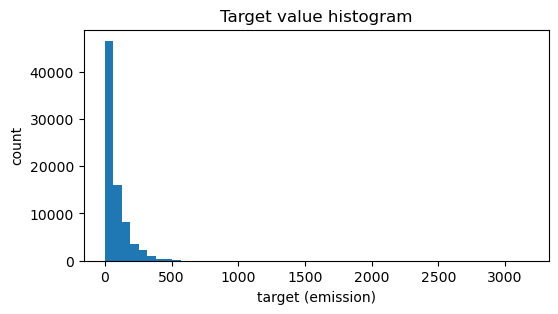

In [10]:
plt.figure(figsize=(6, 3))
plt.hist(train.emission, bins=50)
plt.title('Target value histogram')
plt.xlabel('target (emission)')
plt.ylabel('count')
plt.show()

In [11]:
train.groupby(['latitude', 'longitude']).emission.mean().sort_values()

latitude  longitude
-1.682    29.218          0.000000
-2.859    29.041          0.000000
-1.833    28.467          0.000000
-2.841    29.159          0.000000
-1.974    28.526          0.000000
                          ...     
-1.342    31.358        409.606870
-0.956    30.744        455.398039
-1.346    31.254        475.289138
-2.079    29.321       1221.886518
-2.378    29.222       2233.431628
Name: emission, Length: 497, dtype: float64

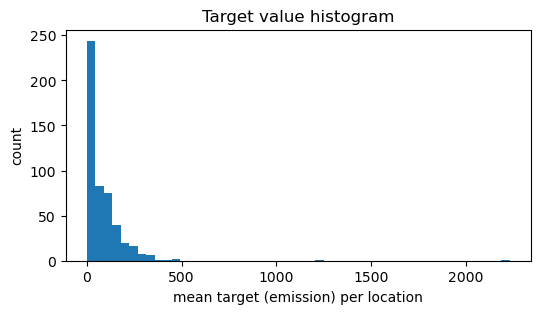

In [12]:
plt.figure(figsize=(6, 3))
plt.hist(train.groupby(['latitude', 'longitude']).emission.mean(), bins=50)
plt.title('Target value histogram')
plt.xlabel('mean target (emission) per location')
plt.ylabel('count')
plt.show()

In [13]:
def rgba_to_hex(color):
    """Return color as #rrggbb for the given color values."""
    red, green, blue, alpha = color
    return f"#{int(red*255):02x}{int(green*255):02x}{int(blue*255):02x}"

temp = train.groupby(['latitude', 'longitude']).emission.mean().reset_index()
geometry = gpd.points_from_xy(temp.longitude, temp.latitude)

cmap = matplotlib.colormaps['coolwarm']
normalizer = matplotlib.colors.Normalize(vmin=np.log1p(temp.emission.min()), vmax=np.log1p(temp.emission.max()))

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geometry]

# Iterate through list and add a marker for each location
for coordinates, emission in zip(geo_df_list, temp.emission):
#     print(emission, normalizer(emission), rgba_to_hex(cmap(normalizer(emission))))
    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            color = rgba_to_hex(cmap(normalizer(np.log1p(emission))))),
        )
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

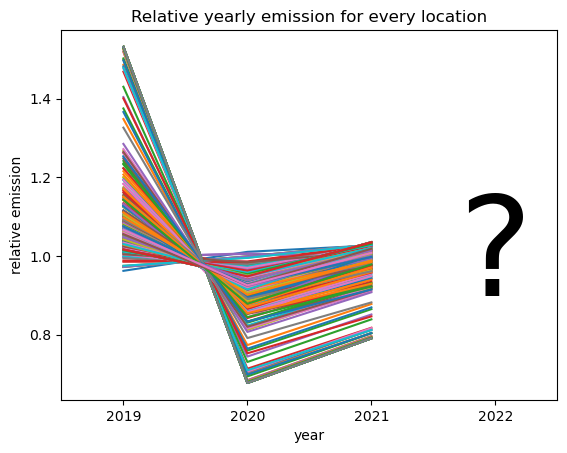

In [14]:
for ll in train[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = train[(train.latitude == ll[1].latitude) & (train.longitude == ll[1].longitude)].groupby('year').emission.mean()
    time_series = time_series / time_series.mean()
    plt.plot(time_series.index, time_series)
plt.title('Relative yearly emission for every location')
plt.xlabel('year')
plt.ylabel('relative emission')
plt.xlim(2018.5, 2022.5)
plt.text(2022, 0.9, '?', fontsize=100, ha='center')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [15]:
score_list = []
kf = LeaveOneGroupOut()
for fold, (idx_tr, idx_va) in enumerate(kf.split(train, groups=train.year)):
    X_tr = train.iloc[idx_tr][['longitude', 'latitude', 'week_no']]
    y_tr = train.iloc[idx_tr]['emission']
    X_va = train.iloc[idx_va][['longitude', 'latitude', 'week_no']]
    y_va = train.iloc[idx_va]['emission']

    model = DecisionTreeRegressor()
    model.fit(X_tr, y_tr)
    y_va_pred = model.predict(X_va)
    rmse = mean_squared_error(y_va, y_va_pred, squared=False)
    print(f"Fold {fold} year {train.iloc[idx_va].year.iloc[0]}: rmse = {rmse:.2f}")
    score_list.append(rmse)

rmse = sum(score_list) / len(score_list)
print(f"Overall RMSE: {rmse:.2f}")

Fold 0 year 2019: rmse = 20.29
Fold 1 year 2020: rmse = 27.14
Fold 2 year 2021: rmse = 19.77
Overall RMSE: 22.40


In [16]:
model = DecisionTreeRegressor()
model.fit(train[['longitude', 'latitude', 'week_no']], train.emission)
y_pred = model.predict(test[['longitude', 'latitude', 'week_no']])
submission_standard = pd.Series(y_pred, name='emission', index=test.index)
submission_standard.to_csv('submission_standard.csv')
submission_standard

ID_LAT_LON_YEAR_WEEK
ID_-0.510_29.290_2022_00     3.608051
ID_-0.510_29.290_2022_01     4.016319
ID_-0.510_29.290_2022_02     4.138755
ID_-0.510_29.290_2022_03     4.184737
ID_-0.510_29.290_2022_04     4.247569
                              ...    
ID_-3.299_30.301_2022_44    28.725407
ID_-3.299_30.301_2022_45    29.048892
ID_-3.299_30.301_2022_46    29.252211
ID_-3.299_30.301_2022_47    29.794027
ID_-3.299_30.301_2022_48    28.759248
Name: emission, Length: 24353, dtype: float64

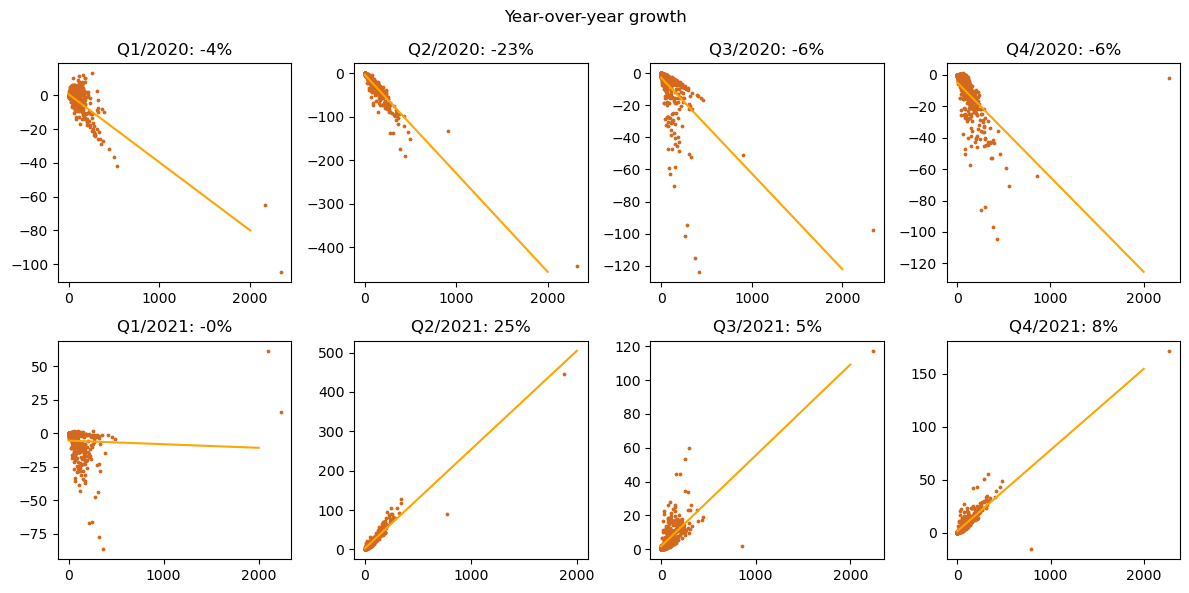

In [17]:
temp = train.copy()
temp['quarter'] = temp['week_no'] // 14 + 1
grouped = temp.groupby(['longitude', 'latitude', 'year', 'quarter'])[['emission']].mean()
grouped = grouped.unstack(['longitude', 'latitude'])
delta = 4
one_year_difference = grouped.shift(-delta) - grouped

n_diagrams = 8
_, axs = plt.subplots(2, 4, figsize=(12, 6))
for i in range(n_diagrams):
    ax = axs.ravel()[i]
    ax.scatter(grouped.iloc[i], one_year_difference.iloc[i], c='chocolate', s=3)
    lr = LinearRegression()
    lr.fit(grouped.iloc[i].values.reshape(-1, 1), one_year_difference.iloc[i])
    xs = np.array([[0], [2000]])
    y_pred = lr.predict(xs)
    ax.plot(xs, y_pred, color='orange')
    index = grouped.index[i+delta]
    ax.set_title(f"Q{index[1]}/{index[0]}: {lr.coef_[0]:1.0%}")
    ax.set_xticks([0, 1000, 2000])
plt.suptitle('Year-over-year growth')
plt.tight_layout()
# plt.savefig('growth.png', bbox_inches='tight')
plt.show()

In [18]:
# Extrapolation of the growth trend - feel free to change the factor
submission_plus5 = submission_standard * 1.05
submission_plus5.to_csv('submission_plus5.csv')
submission_plus5

ID_LAT_LON_YEAR_WEEK
ID_-0.510_29.290_2022_00     3.788453
ID_-0.510_29.290_2022_01     4.217135
ID_-0.510_29.290_2022_02     4.345693
ID_-0.510_29.290_2022_03     4.393974
ID_-0.510_29.290_2022_04     4.459947
                              ...    
ID_-3.299_30.301_2022_44    30.161677
ID_-3.299_30.301_2022_45    30.501336
ID_-3.299_30.301_2022_46    30.714822
ID_-3.299_30.301_2022_47    31.283728
ID_-3.299_30.301_2022_48    30.197210
Name: emission, Length: 24353, dtype: float64

In [19]:
# Drop the covid weeks as outliers
train_nocovid = train[(train.year == 2019) |
                       (train.year == 2020) & (train.week_no <= 8) |
                       (train.year == 2021) & (train.week_no > 8)]

model = DecisionTreeRegressor()
model.fit(train_nocovid[['longitude', 'latitude', 'week_no']], train_nocovid.emission)
y_pred = model.predict(test[['longitude', 'latitude', 'week_no']])
submission_nocovid = pd.Series(y_pred, name='emission', index=test.index)
submission_nocovid.to_csv('submission_nocovid.csv')
submission_nocovid

ID_LAT_LON_YEAR_WEEK
ID_-0.510_29.290_2022_00     3.752297
ID_-0.510_29.290_2022_01     4.038571
ID_-0.510_29.290_2022_02     4.192749
ID_-0.510_29.290_2022_03     4.235518
ID_-0.510_29.290_2022_04     4.290476
                              ...    
ID_-3.299_30.301_2022_44    29.836845
ID_-3.299_30.301_2022_45    30.249885
ID_-3.299_30.301_2022_46    30.432125
ID_-3.299_30.301_2022_47    30.868620
ID_-3.299_30.301_2022_48    29.674269
Name: emission, Length: 24353, dtype: float64

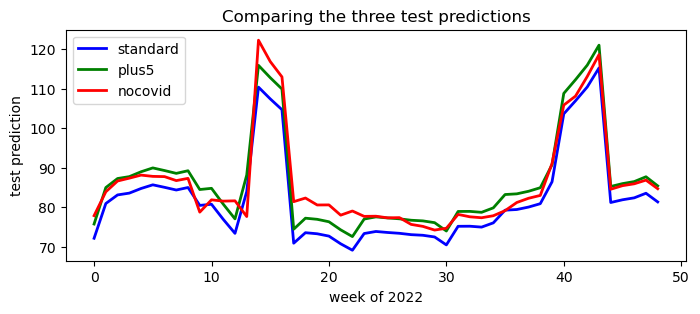

In [20]:
plt.figure(figsize=(8, 3))
plt.title("Comparing the three test predictions")
plt.xlabel('week of 2022')
plt.ylabel('test prediction')
plt.plot(range(49), submission_standard.groupby(test.week_no).mean(), label='standard', lw=2, color='b')
plt.plot(range(49), submission_plus5.groupby(test.week_no).mean(), label='plus5', lw=2, color='g')
plt.plot(range(49), submission_nocovid.groupby(test.week_no).mean(), label='nocovid', lw=2, color='r')
plt.legend()
# plt.savefig('comparison.png', bbox_inches='tight')
plt.show()